### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [129]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [130]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [131]:
regs = np.arange(0, 100, 2)
array_W = [gradient_descent_reg_l2(X_st, y, iterations=1000, reg=reg) for reg in regs]

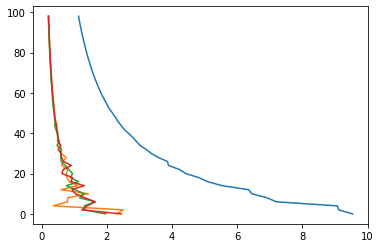

In [132]:
array_W = np.array(array_W)
for i in range(array_W.shape[1]):
    plt.plot(array_W[:, i], regs)

**Вывод:** *веса при увеличении коэффициента регуляризации становятся менее значимые и стремятся к нулю.*

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [133]:
def der(x):
    return x / abs(x)

In [134]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg * der(W) 
        
        W -= eta * (dQ + dReg)
    return W

In [135]:
regs = np.arange(0, 100, 2)
array_W = [gradient_descent_reg_l1(X_st, y, iterations=1000, reg=reg) for reg in regs]

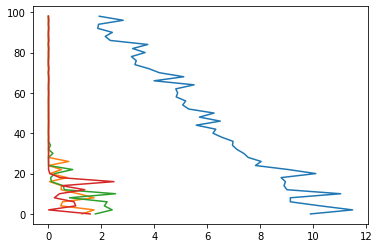

In [136]:
array_W = np.array(array_W)
for i in range(array_W.shape[1]):
    plt.plot(array_W[:, i], regs)

**Вывод:** *малые коэфициенты при L1 быстро стремятся к нулю в отличие от L2.*

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [137]:
from sklearn.preprocessing import normalize, StandardScaler

In [138]:
m = np.random.randint(10, size=(3, 3))
m

array([[4, 0, 7],
       [7, 0, 0],
       [9, 9, 2]])

In [139]:
st_m = StandardScaler().fit_transform(m)
norm_m = normalize(m)

st_m_2 = StandardScaler().fit_transform(norm_m) # + обратное перобразование
norm_m_2 = normalize(st_m)

In [140]:
def mean_std(x):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    display(means, stds)

In [141]:
mean_std(st_m) == mean_std(st_m_2)

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

True

In [142]:
mean_std(norm_m_2) == mean_std(norm_m)

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

True

**Ответ:** *можно! При сравнении среднего и стандартного отклонений значения не изменяются. То же относится и к весам.*

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [143]:
from sklearn.datasets import make_regression

In [144]:
regr = make_regression()

def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [145]:
n_features = 2 # - количество признаков
n_objects = 1000 # - количество объектов

eta = 0.05 # - шаг градиентного спуска

max_iter = 1e3 # - максимальное число итераций

min_weight_dist = 1e-6 # - критерий сходимости

w = np.zeros(n_features) # - нулевые веса

X, Y, coef = make_regression(n_samples=n_objects, n_features=n_features, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

# GD:
def gd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))

        iter_num += 1
        w = new_w

    iters_gd = iter_num
    errors_gd = errors
    w_list_gd = np.array(w_list)

    return (iters_gd, errors_gd, w_list_gd)


# SDG:
def sgd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:

        train_ind = np.random.randint(X.shape[0], size=1) # - генерация случайного индекса объекта выборки

        y_pred = np.dot(X[train_ind], w)
        new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        error = mserror(X, new_w, Y)

        w_list.append(new_w.copy())
        errors.append(error)

        iter_num += 1
        w = new_w

    iters_sgd = iter_num
    errors_sgd = errors
    w_list_sgd = np.array(w_list)
    
    return (iters_sgd, errors_sgd, w_list_sgd)

In [146]:
w_list = [w.copy()] # - список векторов весов после каждой итерации

errors = [] # - значения ошибок после каждой итерации

weight_dist = np.inf # - начальная разницу весов

iter_num = 0 # - счетчик итераций

iters_gd, errors_gd, w_list_gd = gd(w, w_list, errors, weight_dist, iter_num, max_iter)

In [147]:
w_list = [w.copy()]
errors = []
weight_dist = np.inf
iter_num = 0
w = np.zeros(n_features)

iters_sgd, errors_sgd, w_list_sgd = sgd(w, w_list, errors, weight_dist, iter_num, max_iter)

In [148]:
if iters_sgd > iters_gd:
    print('Для достижения сходимости количество итераций при SGD (', iters_sgd, ') превышает количество итераций при GD (', iters_gd,'),\n' 'что подтверждает гафик ниже...')
else: False

Для достижения сходимости количество итераций при SGD ( 1000 ) превышает количество итераций при GD ( 161 ),
что подтверждает гафик ниже...


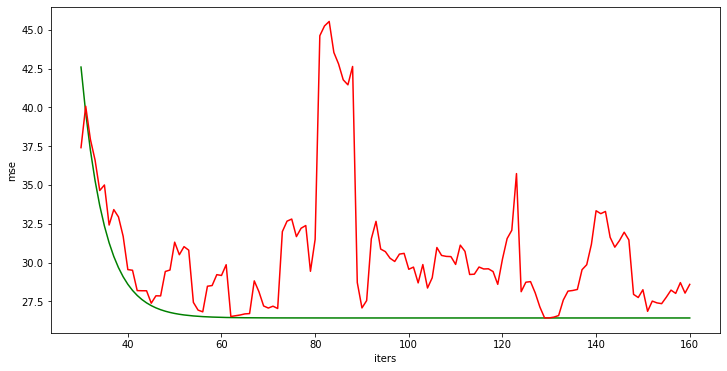

In [149]:
plt.figure(figsize=(12, 6))
plt.xlabel(r'iters')
plt.ylabel(r'mse')
x = range(iters_gd)
delta = 30
plt.plot(x[delta:], errors_gd[delta:], c='g')
plt.plot(x[delta:], errors_sgd[delta:iters_gd], c='r')
plt.show()